<a href="https://colab.research.google.com/github/vaish97/DataScience/blob/main/Datascience_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries for all the sections from a to k here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
import numpy as np

In [2]:
# Load the dataset (Saved the file in my drive)
file_path = '/content/drive/MyDrive/Dry_Bean_Dataset.xlsx'

In [3]:
# Load Excel file
data = pd.read_excel(file_path)

In [4]:
# Display the first few rows and basic info about the dataset
print("\nFirst few rows of the dataset:")
print(data.head())



First few rows of the dataset:
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class 

In [5]:
# Print data information like total entries, columns names etc.,
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  obj

(a) Produce some numerical and graphical summaries of the ‘Dry Bean’ data. Do there appear to be any patterns?

In [6]:
# Print Numerical summeries such as Count, Mean, standard Deviation etc.,
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min   

In [7]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


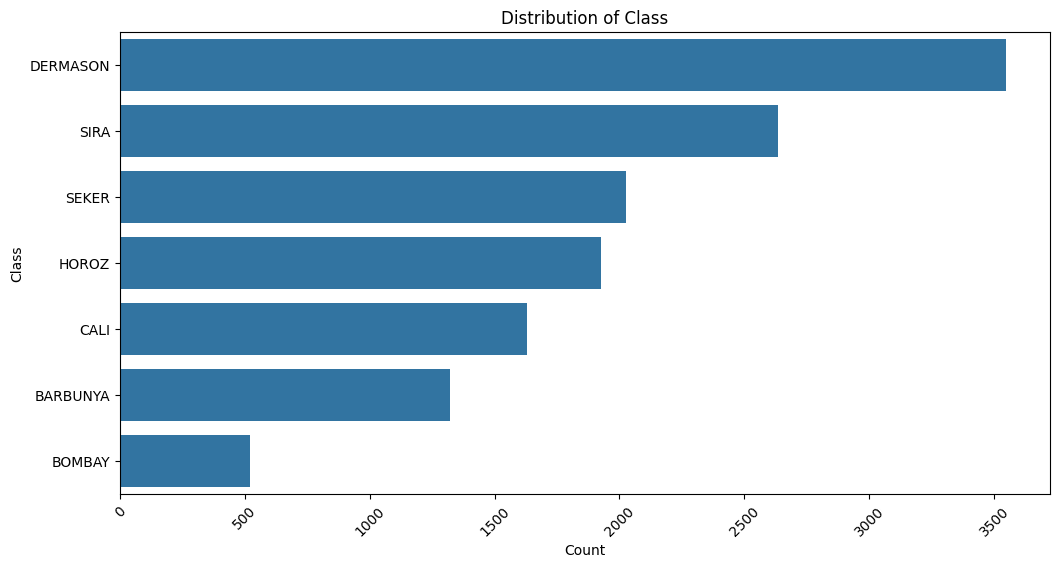

In [8]:
# graphical summaries
# Bar graph to understand the distribution of Classes (Catergorical variables)
categorical_col = 'Class'
plt.figure(figsize=(12, 6))
sns.countplot(data[categorical_col], order=data[categorical_col].value_counts().index)
plt.title('Distribution of Class')
plt.xlabel('Count')
plt.ylabel('Class')
plt.xticks(rotation=45)
plt.show()

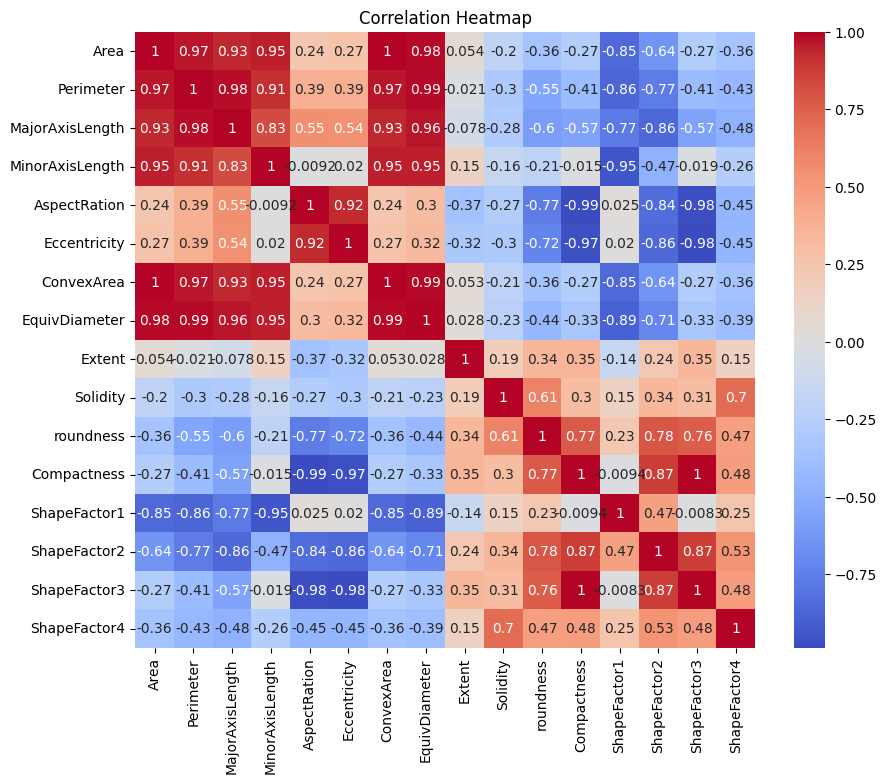

In [9]:
# Numerical summaries: Correlation heatmap
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

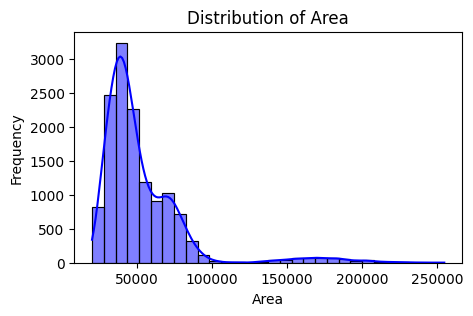

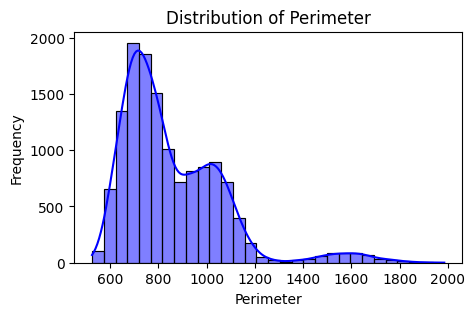

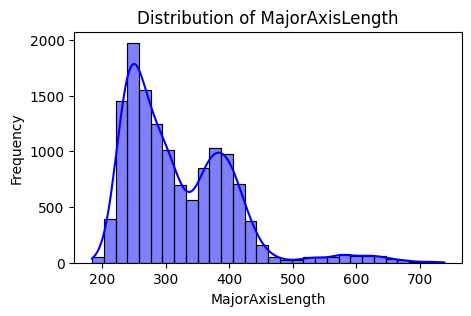

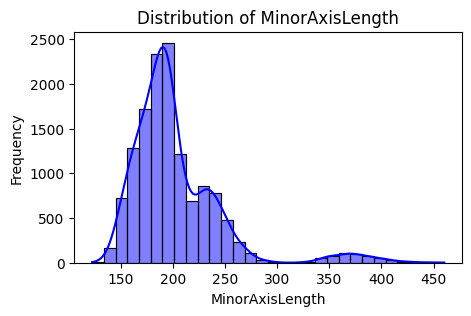

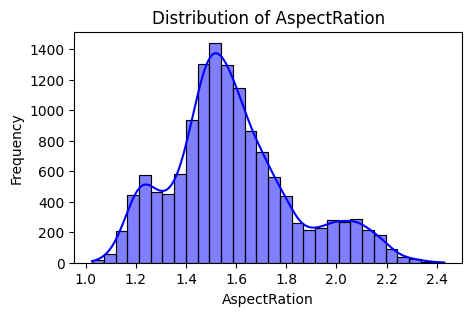

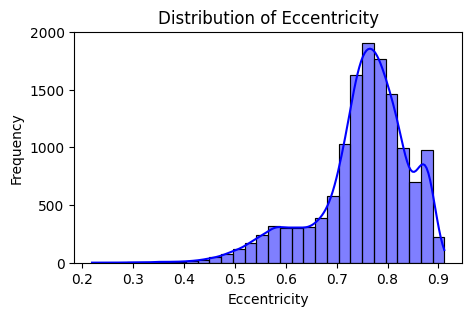

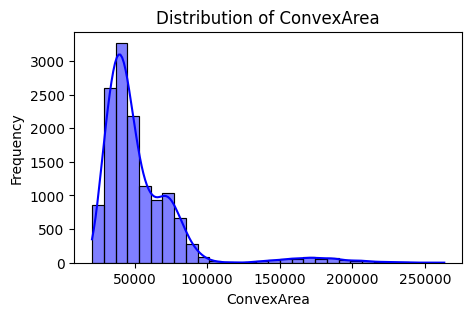

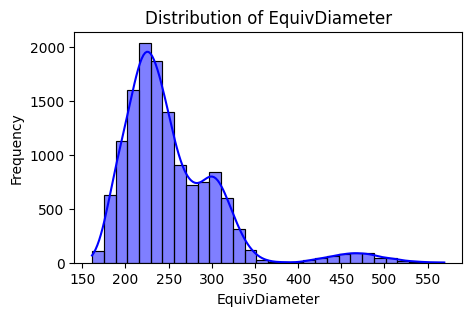

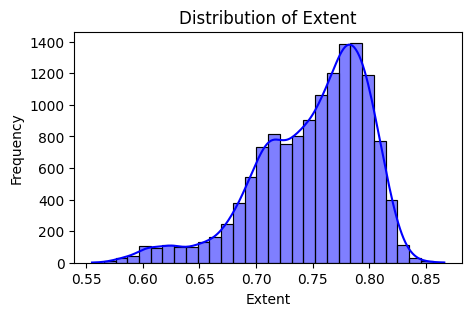

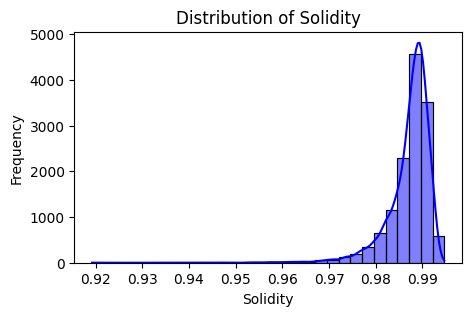

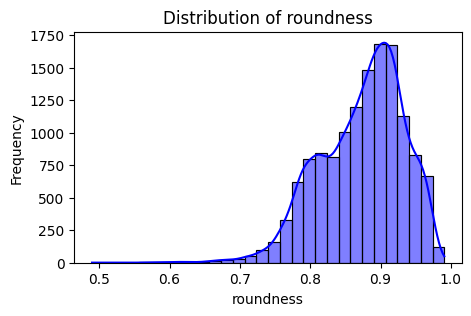

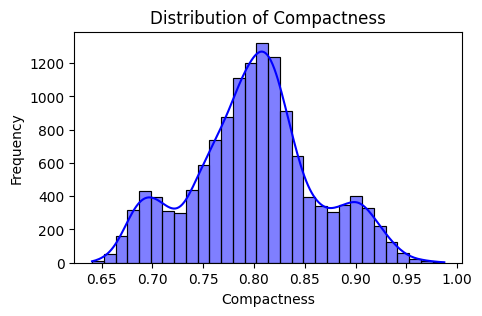

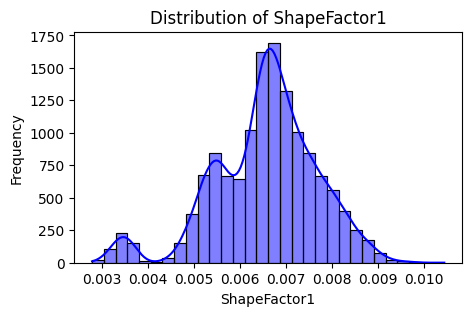

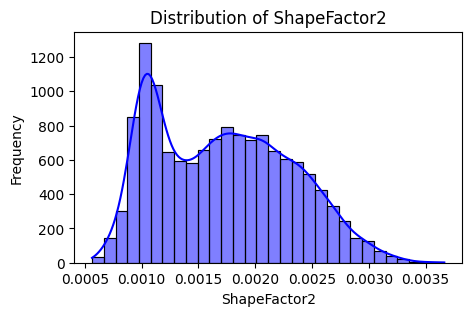

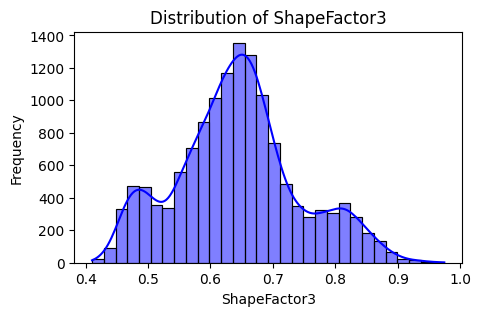

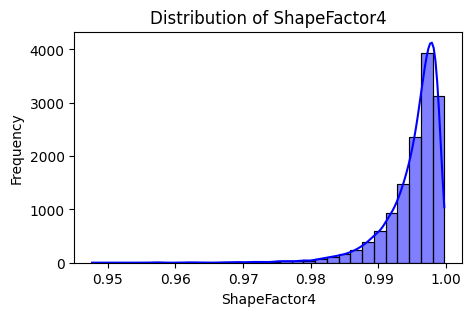

In [10]:
# Distribution of numerical features
for column in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

(c) Display distributions of ‘class’ in each feature.

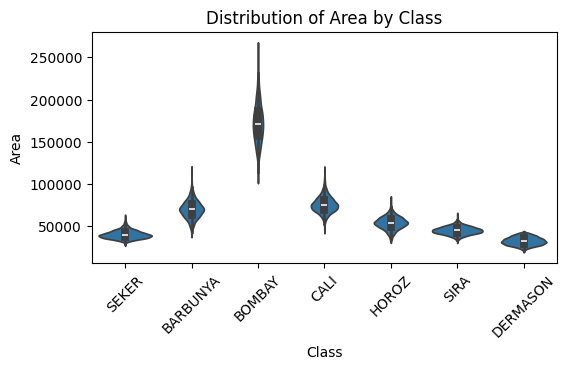

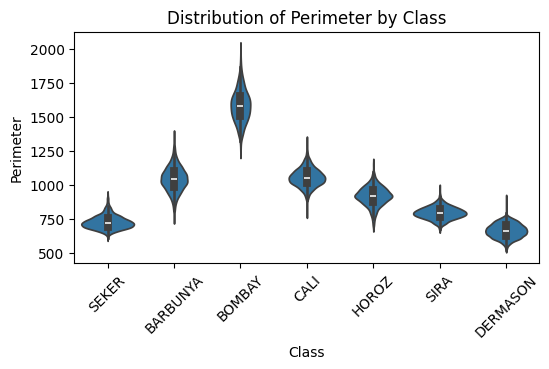

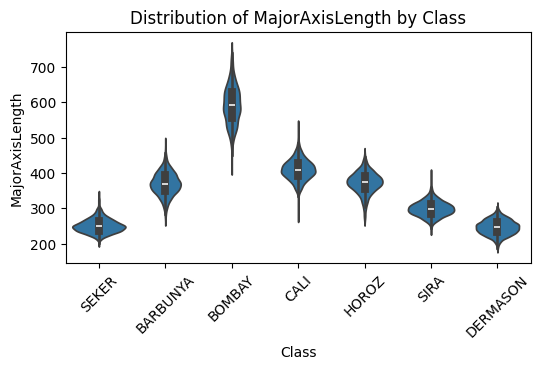

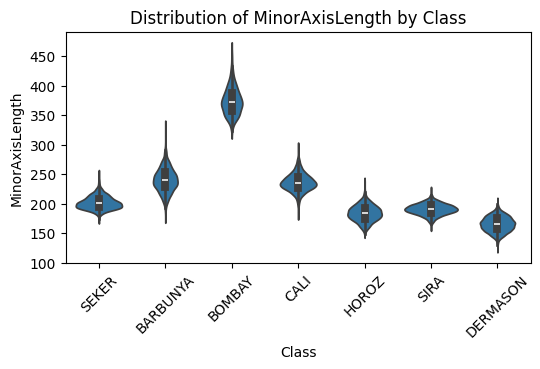

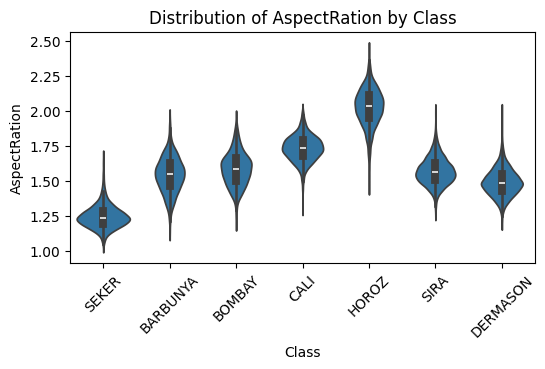

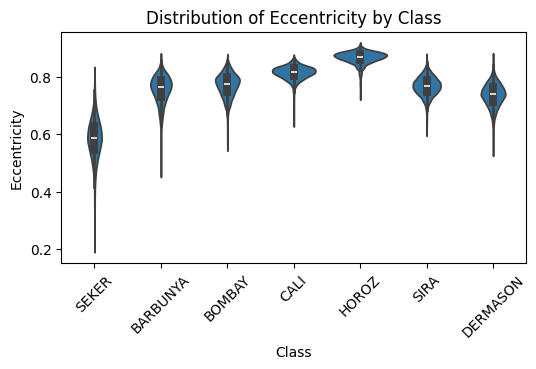

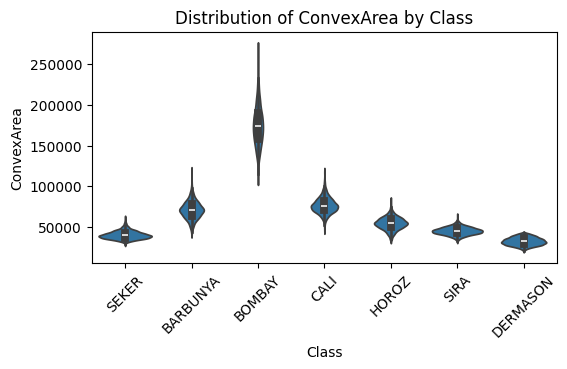

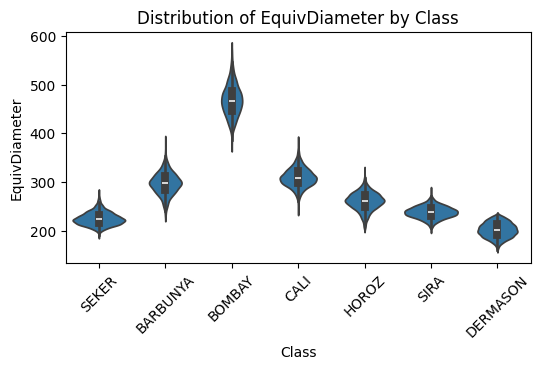

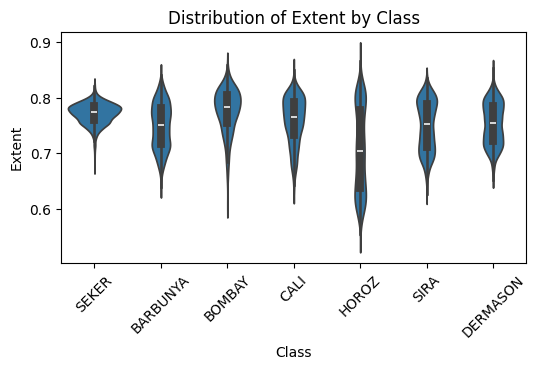

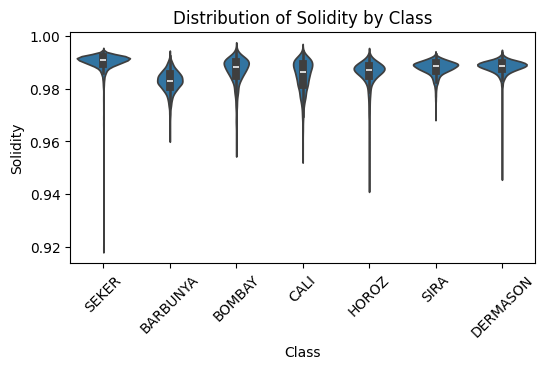

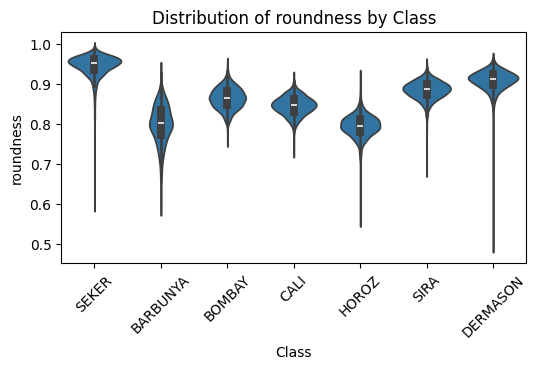

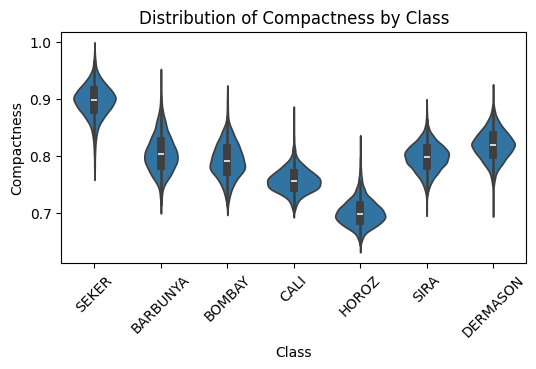

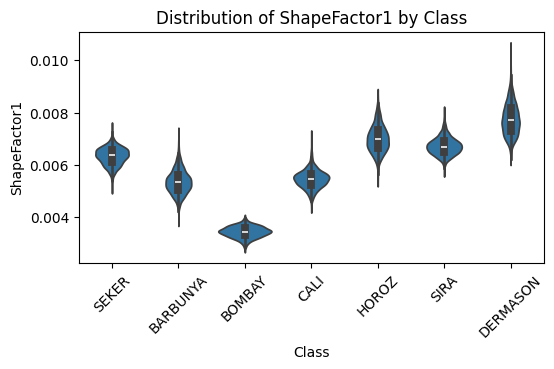

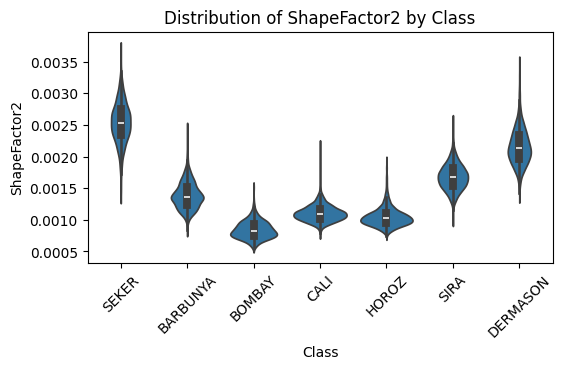

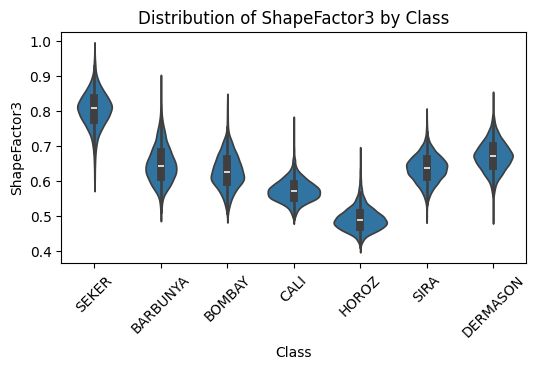

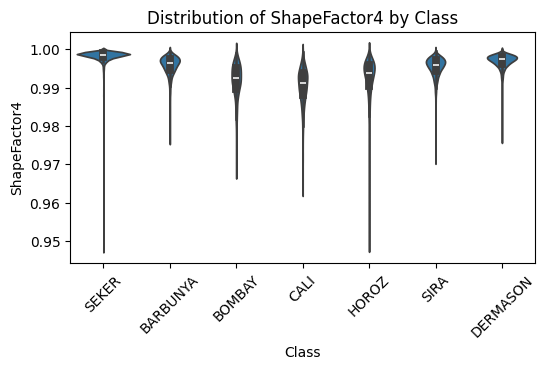

In [11]:
# Distribution of 'Class' in each feature
for column in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.violinplot(x='Class', y=column, data=data)
    plt.title(f'Distribution of {column} by Class')
    plt.xticks(rotation=45)
    plt.show()

(d) Display box plots of ‘class’ in each feature.

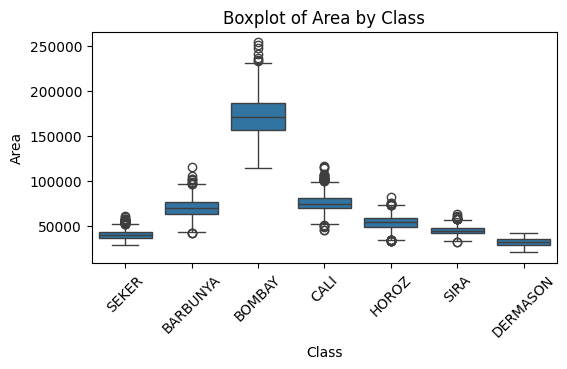

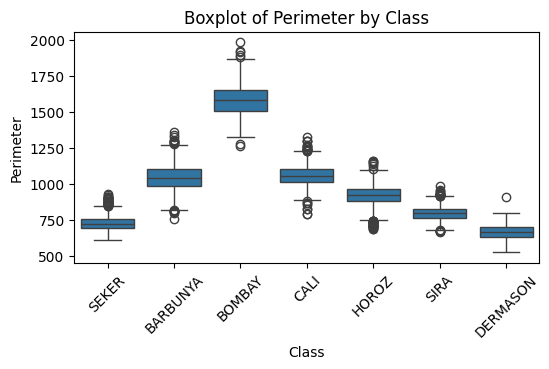

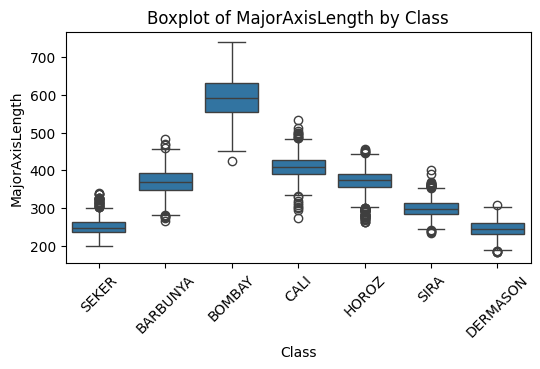

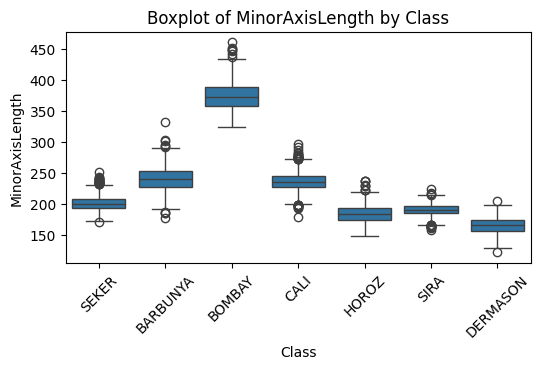

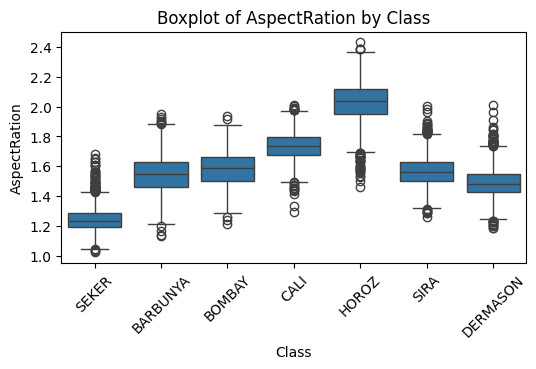

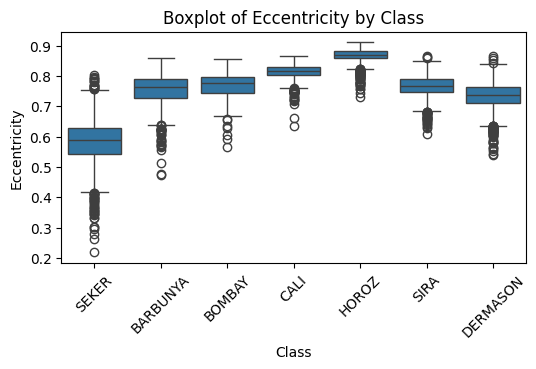

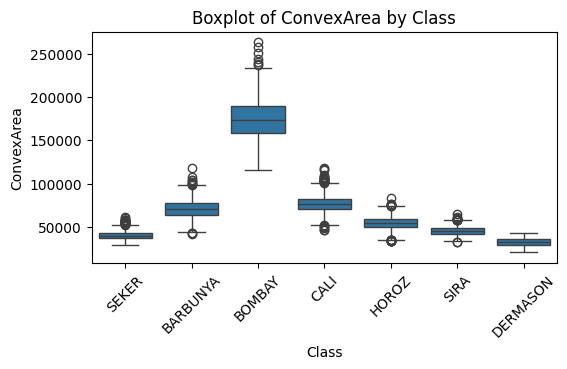

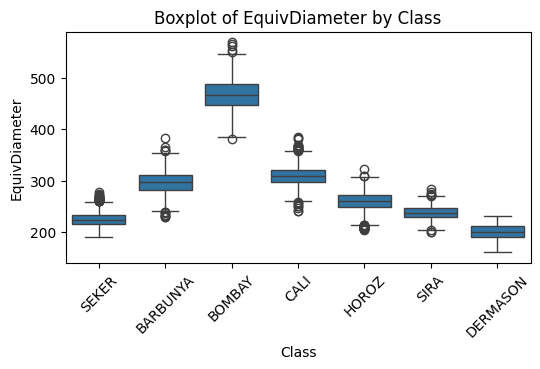

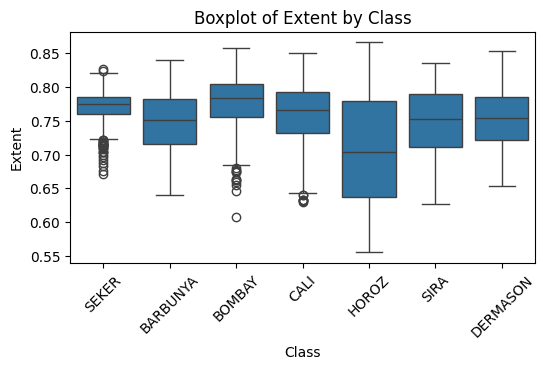

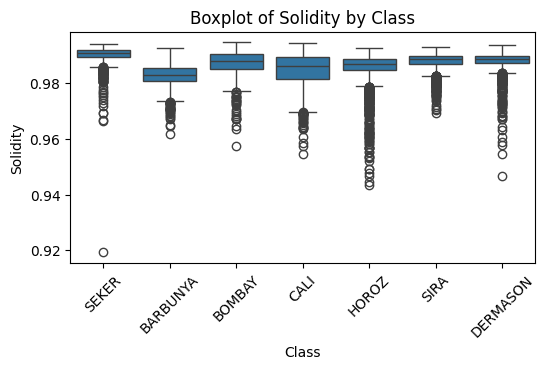

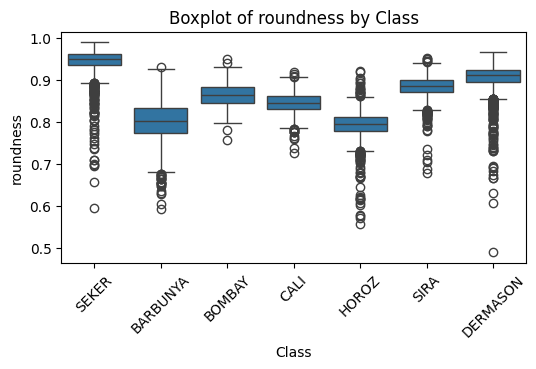

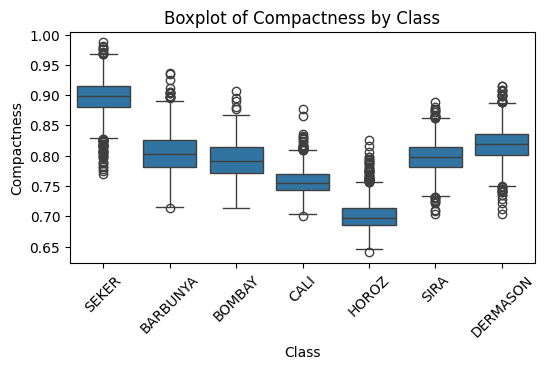

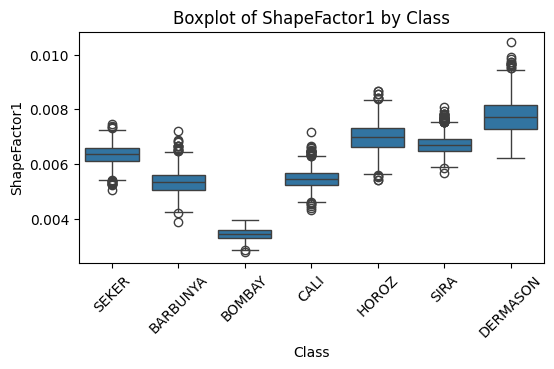

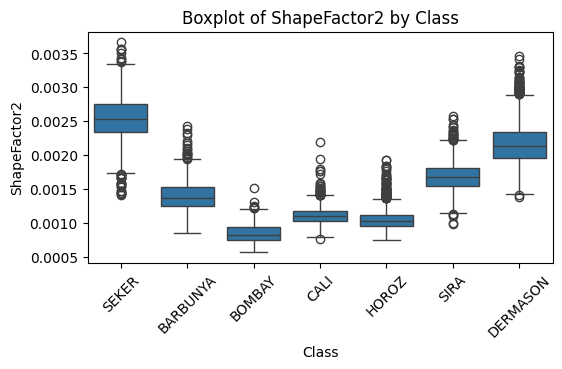

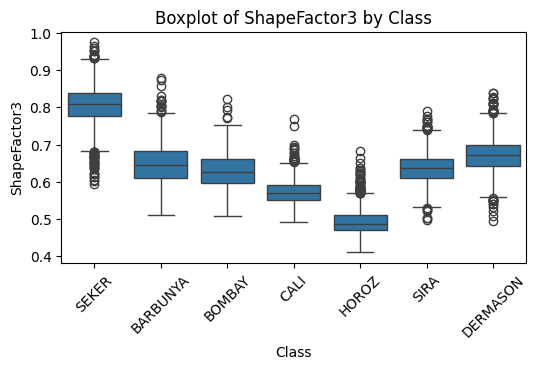

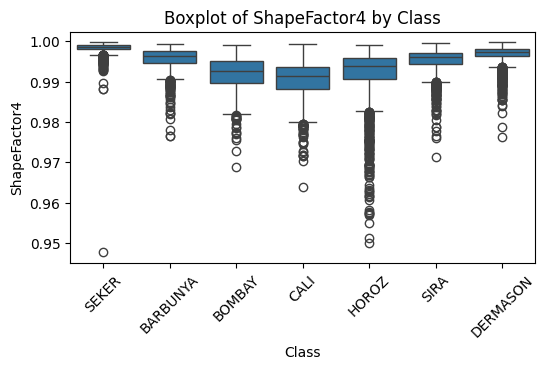

In [12]:
# Boxplots of class in each feature
for column in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=categorical_col, y=column, data=data)
    plt.title(f'Boxplot of {column} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.show()

(b) Use the full data set to perform a logistic regression with ‘class’ as the response and the other variables (features) as predictors. Use the summary function to print the results (including the Python codes). Do any of the predictors appear to be statistically significant? If so, which ones? And why?

In [13]:
# Logistic Regression using full dataset
# Encode the target variable 'Class' (as it's categorical)
label_encoder = LabelEncoder()
data['Class_encoded'] = label_encoder.fit_transform(data['Class'])

# Define predictors (X) and response (y)
X = data.drop(columns=['Class', 'Class_encoded'])  # Exclude non-predictor columns
y = data['Class_encoded']

# Normalize the predictors for better performance
X_normalized = (X - X.mean()) / X.std()

# Add a constant term for the intercept
X_with_const = sm.add_constant(X_normalized)

# Regularise the model with L2 regularization and fit it
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', max_iter=1000)
model.fit(X_normalized, y)

# Fit a logistic regression model
logit_model = sm.MNLogit(y, X_with_const)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:          Class_encoded   No. Observations:                13611
Model:                        MNLogit   Df Residuals:                    13509
Method:                           MLE   Df Model:                           96
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                     nan
Time:                        06:26:09   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -24969.
Covariance Type:            nonrobust   LLR p-value:                       nan
Class_encoded=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const                  nan        nan        nan        nan         nan         nan
Area               

In [14]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X_with_const = sm.add_constant(X_normalized)  # Add intercept
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i+1) for i in range(len(X.columns))]

print(vif_data)


            Feature            VIF
0              Area   81390.772240
1         Perimeter    3573.980197
2   MajorAxisLength   87936.513102
3   MinorAxisLength   77482.673330
4      AspectRation   13918.856718
5      Eccentricity    1183.004420
6        ConvexArea   78552.516774
7     EquivDiameter  314929.768895
8            Extent       1.241536
9          Solidity      14.053550
10        roundness     104.028512
11      Compactness  276769.624251
12     ShapeFactor1     607.175671
13     ShapeFactor2    1245.330594
14     ShapeFactor3  200286.806522
15     ShapeFactor4      67.043776


In [15]:
# Dropping the highly corelated features
# Compute the correlation matrix
correlation_matrix = X.corr()

# Set a threshold for high correlation (e.g., > 0.9)
high_corr_threshold = 0.9
high_corr_pairs = correlation_matrix.abs() > high_corr_threshold

# Print highly correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if high_corr_pairs.iloc[i, j]:
            print(f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} are highly correlated")


Area and Perimeter are highly correlated
Area and MajorAxisLength are highly correlated
Area and MinorAxisLength are highly correlated
Area and ConvexArea are highly correlated
Area and EquivDiameter are highly correlated
Perimeter and MajorAxisLength are highly correlated
Perimeter and MinorAxisLength are highly correlated
Perimeter and ConvexArea are highly correlated
Perimeter and EquivDiameter are highly correlated
MajorAxisLength and ConvexArea are highly correlated
MajorAxisLength and EquivDiameter are highly correlated
MinorAxisLength and ConvexArea are highly correlated
MinorAxisLength and EquivDiameter are highly correlated
MinorAxisLength and ShapeFactor1 are highly correlated
AspectRation and Eccentricity are highly correlated
AspectRation and Compactness are highly correlated
AspectRation and ShapeFactor3 are highly correlated
Eccentricity and Compactness are highly correlated
Eccentricity and ShapeFactor3 are highly correlated
ConvexArea and EquivDiameter are highly correl

In [16]:
# Drop redundant features based on correlation
features_to_drop = [
    'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
    'EquivDiameter', 'Eccentricity', 'Compactness', 'ShapeFactor3'
]
X_reduced = X_normalized.drop(columns=features_to_drop)

print("Remaining features:", X_reduced.columns)


Remaining features: Index(['Area', 'AspectRation', 'Extent', 'Solidity', 'roundness',
       'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor4'],
      dtype='object')


In [17]:
# Re-fitting the model
# Add a constant term for the intercept
X_reduced_with_const = sm.add_constant(X_reduced)

# Fit logistic regression
logit_model = sm.MNLogit(y, X_reduced_with_const)
result = logit_model.fit()

# Display summary
print(result.summary())


         Current function value: 0.207592
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:          Class_encoded   No. Observations:                13611
Model:                        MNLogit   Df Residuals:                    13557
Method:                           MLE   Df Model:                           48
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  0.8868
Time:                        06:26:15   Log-Likelihood:                -2825.5
converged:                      False   LL-Null:                       -24969.
Covariance Type:            nonrobust   LLR p-value:                     0.000
Class_encoded=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -44.9294   4052.228     -0.011      0.991   -7987.151    7897.292
Area               55.7587   4869.607      0.011      0.991   -9488.496    9600.013
AspectRation      -27.2544   450

In [18]:
# Re-check the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for reduced feature set
X_reduced_with_const = sm.add_constant(X_reduced)  # Add intercept
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced_with_const.values, i+1) for i in range(len(X_reduced.columns))]

print(vif_data_reduced)


        Feature        VIF
0          Area   5.052496
1  AspectRation  17.760413
2        Extent   1.227286
3      Solidity   4.718985
4     roundness   7.070389
5  ShapeFactor1   8.282059
6  ShapeFactor2  18.448739
7  ShapeFactor4   3.433778


(e) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling us about the types of mistakes made by logistic regression.

In [19]:
# Compute confusion matrix and accuracy
y_pred = result.predict(X_reduced_with_const).idxmax(axis=1)  # Get the class with highest probability

conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y, y_pred))


Confusion Matrix:
 [[1200    0   74    0    4   10   34]
 [   0  522    0    0    0    0    0]
 [  49    0 1534    0   27    4   16]
 [   1    0    0 3257    8   48  232]
 [   3    0   26   16 1836    0   47]
 [  15    0    2   26    1 1923   60]
 [   4    0   10  226   39   34 2323]]

Accuracy: 0.9253544926897362

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      1322
           1       1.00      1.00      1.00       522
           2       0.93      0.94      0.94      1630
           3       0.92      0.92      0.92      3546
           4       0.96      0.95      0.96      1928
           5       0.95      0.95      0.95      2027
           6       0.86      0.88      0.87      2636

    accuracy                           0.93     13611
   macro avg       0.94      0.94      0.94     13611
weighted avg       0.93      0.93      0.93     13611



(f) Fit the logistic regression model using 80% of randomly selected data from the full data set as a training dataset with all the features as predictors. Compute the confusion matrix and the overall fraction of correct predictions for the held-out data.

In [20]:
# Logistic Regression Model with 80% data

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# Fit logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Compute overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion Matrix:
 [[236   0  18   0   0   4   7]
 [  0 104   0   0   0   0   0]
 [  8   0 307   0   5   2   4]
 [  0   0   0 640   0  13  56]
 [  2   0   4   5 367   0   8]
 [  2   0   0   5   0 387  12]
 [  0   0   1  42   9  11 464]]

Accuracy: 0.9199412412780023

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       265
           1       1.00      1.00      1.00       104
           2       0.93      0.94      0.94       326
           3       0.92      0.90      0.91       709
           4       0.96      0.95      0.96       386
           5       0.93      0.95      0.94       406
           6       0.84      0.88      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



(g) Repeat (f) using LDA.

In [21]:
# LDA
lda = LDA()
# Splitting the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print("\nConfusion Matrix (LDA):")
print(conf_matrix_lda)
print("\nOverall Accuracy:", accuracy_lda)



Confusion Matrix (LDA):
[[219   0  26   0   1   2  17]
 [  0 104   0   0   0   0   0]
 [  2   0 310   0   5   1   8]
 [  0   0   0 581   0  22 106]
 [  1   0  15   4 350   0  16]
 [  5   0   0   4   0 369  28]
 [  3   0   0  19   3   4 498]]

Overall Accuracy: 0.8927653323540213


(g) Repeat (f) using QDA.

In [22]:
# QDA
qda = QDA()
# Splitting the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)

print("\nConfusion Matrix (QDA):")
print(conf_matrix_qda)
print("\nOverall Accuracy:", accuracy_qda)


Confusion Matrix (QDA):
[[235   0  20   0   1   4   5]
 [  0 104   0   0   0   0   0]
 [ 10   0 308   0   7   1   0]
 [  0   0   0 614   0  15  80]
 [  1   0   4   6 370   0   5]
 [  2   0   0   6   0 382  16]
 [  6   0   0  31  15   6 469]]

Overall Accuracy: 0.9114946749908189


(i) Repeat (f) using KNN with K = 1.

In [23]:
# KNN with K=1
knn = KNeighborsClassifier(n_neighbors=1)
# Splitting the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("\nConfusion Matrix (KNN, K=1):")
print(conf_matrix_knn)
print("\nOverall Accuracy:", accuracy_knn)


Confusion Matrix (KNN, K=1):
[[239   0  14   1   1   2   8]
 [  0 104   0   0   0   0   0]
 [ 10   0 303   0   9   2   2]
 [  0   0   0 633   2  10  64]
 [  4   0   6   1 360   0  15]
 [  2   0   0   9   0 382  13]
 [  5   0   1  63  18   5 435]]

Overall Accuracy: 0.901946382666177


(j) Which of these methods appears to provide the best results on this data?

In [24]:
# Compare methods
methods = ['Logistic Regression', 'LDA', 'QDA', 'KNN (K=1)']
accuracies = [accuracy, accuracy_lda, accuracy_qda, accuracy_knn]
comparison = pd.DataFrame({'Method': methods, 'Accuracy': accuracies})
print("\nMethod Comparison:")
print(comparison.sort_values(by='Accuracy', ascending=False))


Method Comparison:
                Method  Accuracy
0  Logistic Regression  0.919941
2                  QDA  0.911495
3            KNN (K=1)  0.901946
1                  LDA  0.892765


(k) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held-out data. Note that you should also experiment with values for K in the KNN classifier

In [27]:
# Define predictors (X) and response (y)
X = data.drop(columns=['Class', 'Class_encoded'])
y = data['Class_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dataset Shape: {data.shape}")
print("Target Class Distribution:\n", y.value_counts())

# Function to evaluate a model
def evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{model_name} Unique Predictions:\n{np.unique(y_pred, return_counts=True)}")

# 1. Linear Discriminant Analysis (LDA)
lda = LDA(solver='lsqr', shrinkage='auto')  # Use shrinkage to handle warnings
evaluate_model(lda, "LDA")

# 2. Quadratic Discriminant Analysis (QDA)
qda = QDA(reg_param=0.1)  # Regularize QDA
evaluate_model(qda, "QDA")

# 3. Logistic Regression
log_reg = LogisticRegression(max_iter=500, random_state=42)
evaluate_model(log_reg, "Logistic Regression")

# 4. K-Nearest Neighbors (KNN)
best_k = None
best_accuracy = 0

# Experiment different values of K for KNN
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_knn)
    print(f"KNN (k={k}) Accuracy: {accuracy:.4f}")
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"\nBest K for KNN: {best_k} with Accuracy: {best_accuracy:.4f}")
knn = KNeighborsClassifier(n_neighbors=best_k)
evaluate_model(knn, "KNN")


Dataset Shape: (13611, 18)
Target Class Distribution:
 Class_encoded
3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: count, dtype: int64

LDA Confusion Matrix:
[[331   0  34   0   1   4  27]
 [  0 157   0   0   0   0   0]
 [  5   0 468   0   6   2   8]
 [  1   0   0 880   0  17 166]
 [  1   0  16   5 536   0  20]
 [  3   0   0   8   0 547  50]
 [  1   0   0  30   4   4 752]]

LDA Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       397
           1       1.00      1.00      1.00       157
           2       0.90      0.96      0.93       489
           3       0.95      0.83      0.89      1064
           4       0.98      0.93      0.95       578
           5       0.95      0.90      0.93       608
           6       0.74      0.95      0.83       791

    accuracy                           0.90      4084
   macro avg       0.93      0.91      0.92      4084
weighted avg       0.91 